In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [11]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [7]:
import pickle
with open('./data/melted_zip10.pickle', 'rb') as file:
    melted_zip10 = pickle.load(file)
    

# ARIMA Modeling

In [8]:
melted_zip10.head()

,value
time,
1996-04-01,29900.0
1996-05-01,30300.0
1996-06-01,30600.0
1996-07-01,30900.0
1996-08-01,31300.0


In [9]:
ts1 = melted_zip10['2010-01-01':]
ts1

,value
time,
2010-01-01,71100.0
2010-02-01,71100.0
2010-03-01,71200.0
2010-04-01,71300.0
2010-05-01,71200.0
...,...
2017-12-01,85500.0
2018-01-01,87300.0
2018-02-01,90000.0


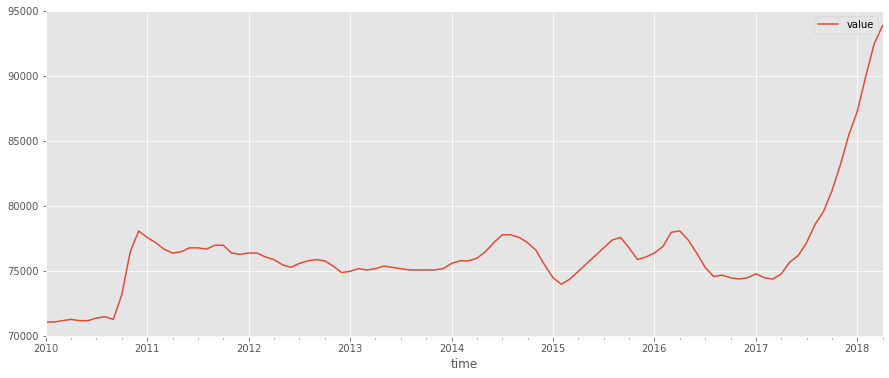

              value
time               
2010-01-01  71100.0
2010-02-01  71100.0
2010-03-01  71200.0
2010-04-01  71300.0
2010-05-01  71200.0


In [12]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [13]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [14]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2509.627336681901
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2416.0461201122544
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2376.9730002838355
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1598.476007927708
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1504.579390723604
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1456.9214175973916
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1498.8782089492513
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1476.0963791088143
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1453.415845511044
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1606.7746997694055
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1527.3001687307212
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1474.9225478815695
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1505.6993265550182
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1476.1763875703814
ARIMA (0, 0, 0) x (1, 1,

ARIMA (0, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1461.1730753446354
ARIMA (0, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1447.881596236681
ARIMA (0, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1476.4371668286876
ARIMA (0, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1447.9489268852337
ARIMA (0, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1432.9627802747764
ARIMA (0, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1498.4960463092398
ARIMA (0, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1455.8363142409742
ARIMA (0, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1423.6822091934844
ARIMA (0, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1475.631131713164
ARIMA (0, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1463.0332089198396
ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1443.7286562747192
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1466.8639388721058
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1454.099115140908
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1434.5246977594936
ARIMA (0, 1, 1) x (2, 2

ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1422.4641396655893
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1443.8851694662028
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1425.441274495168
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1411.881474366641
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1494.4087332207257
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1439.9394010947472
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1427.94388034153
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1606.7746997694055
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1514.8963779084036
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1514.1603504986467
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1505.6993265550182
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1476.88736916627
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1461.1730747600836
ARIMA (1, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1498.0301676587549
ARIMA (1, 0, 0) x (0, 2, 1

ARIMA (1, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1447.9489270618458
ARIMA (1, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1432.962780216713
ARIMA (1, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1508.3631329747736
ARIMA (1, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1455.8363142328542
ARIMA (1, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1423.6822092301752
ARIMA (1, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1484.0195897587869
ARIMA (1, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1463.6647650587033
ARIMA (1, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1448.6693113854747
ARIMA (1, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1477.8931980941575
ARIMA (1, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1464.420681233536
ARIMA (1, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1434.865888398245
ARIMA (1, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1500.1512157195004
ARIMA (1, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1466.3780775007083
ARIMA (1, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1425.4412732817789
ARIMA (1, 1, 1) x (2, 0

ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1413.9340524905392
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1504.3644312852996
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1447.6094648098685
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1455.1314406168688
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1449.8495426001064
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1436.487186411214
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1425.0116811504447
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1443.6002813884074
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1429.5172940243142
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1411.8920750238183
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1490.1585769595185
ARIMA (1, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1439.6109920662925
ARIMA (1, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1425.860945044062
ARIMA (2, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1506.4041999016636
ARIMA (2, 0, 0) x (0, 

ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1437.6543321229155
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1432.5575341882943
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1475.6462303951898
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1463.0322852155746
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1442.685907653201
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1466.8810719901858
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1454.1107956338103
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1434.5246978306552
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1488.1445257578405
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1472.15617998395
ARIMA (2, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1425.4412758177286
ARIMA (2, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1462.404244146915
ARIMA (2, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1464.3568390028558
ARIMA (2, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1438.0488346357663
ARIMA (2, 1, 1) x (1, 1,

ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1414.3434099510498
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1451.1972528038875
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1436.487174510766
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1425.4336424694845
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1442.1167819294988
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1427.2635956934864
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1411.9601431590704
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1489.8827125273929
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1432.0896438741863
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1417.1580996874904
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1433.742819371696
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1436.418892980298
ARIMA (2, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1426.2651779025198
ARIMA (2, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1426.6085214557631
ARIMA (2, 2, 2) x (2, 1

In [15]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (0, 2, 2)
pdqs    (1, 2, 2, 1)
aic          1408.29
Name: 233, dtype: object

In [16]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(0, 2, 2), 
                                        seasonal_order=(1, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3058      0.474     -0.645      0.519      -1.234       0.623
ma.L2         -0.5472      0.248     -2.207      0.027      -1.033      -0.061
ar.S.L1        0.4310      0.099      4.334      0.000       0.236       0.626
ma.S.L1       -2.0672      0.419     -4.928      0.000      -2.889      -1.245
ma.S.L2        1.0736      0.438      2.449      0.014       0.214       1.933
sigma2      2.186e+05   1.73e+05      1.265      0.206    -1.2e+05    5.57e+05


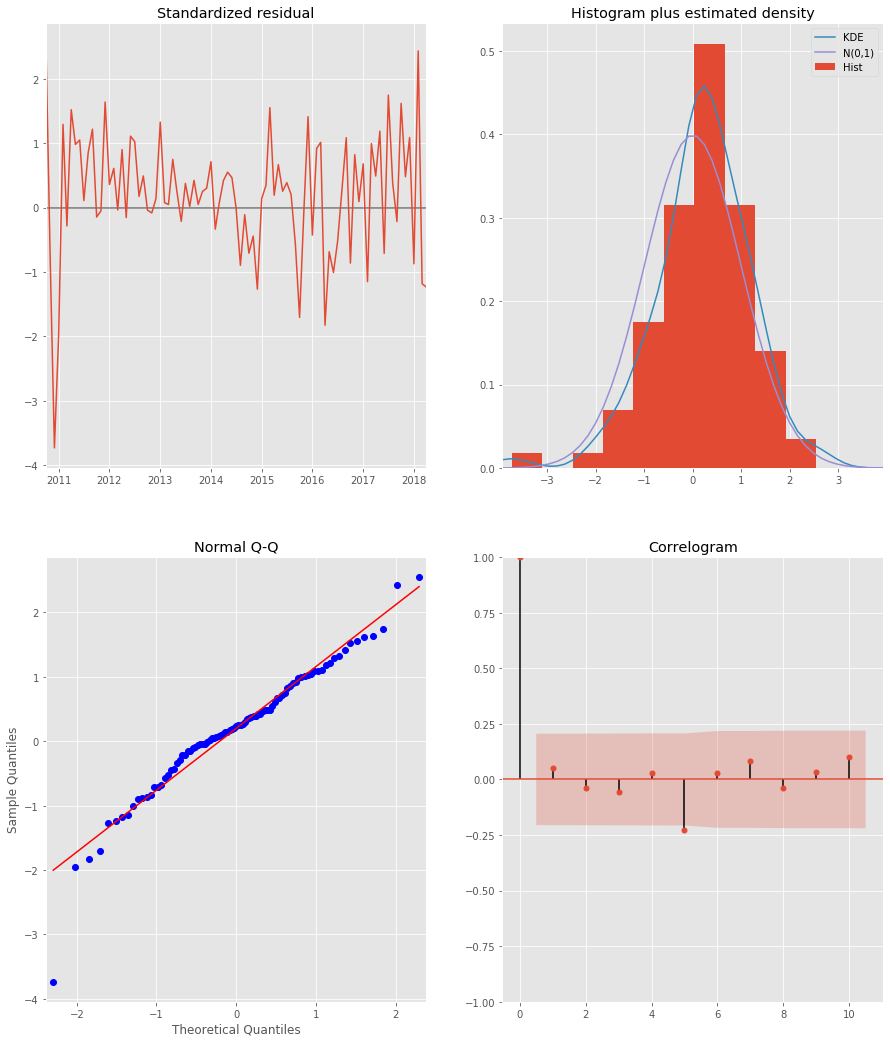

In [17]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [18]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

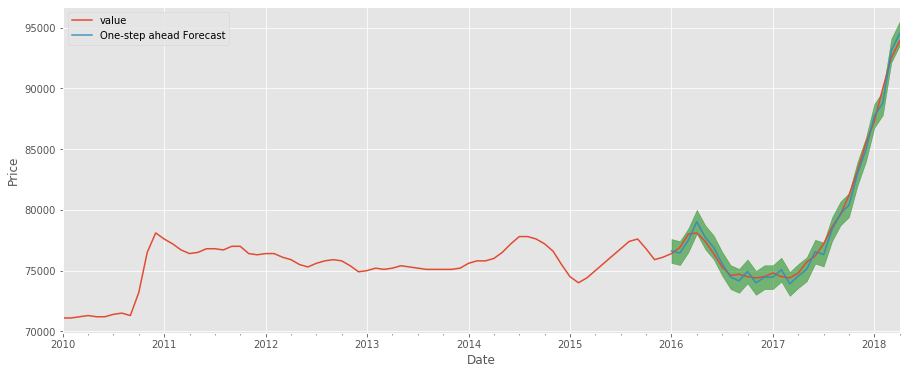

In [19]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [20]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 533.89


## Dynamic Forecasting

In [21]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

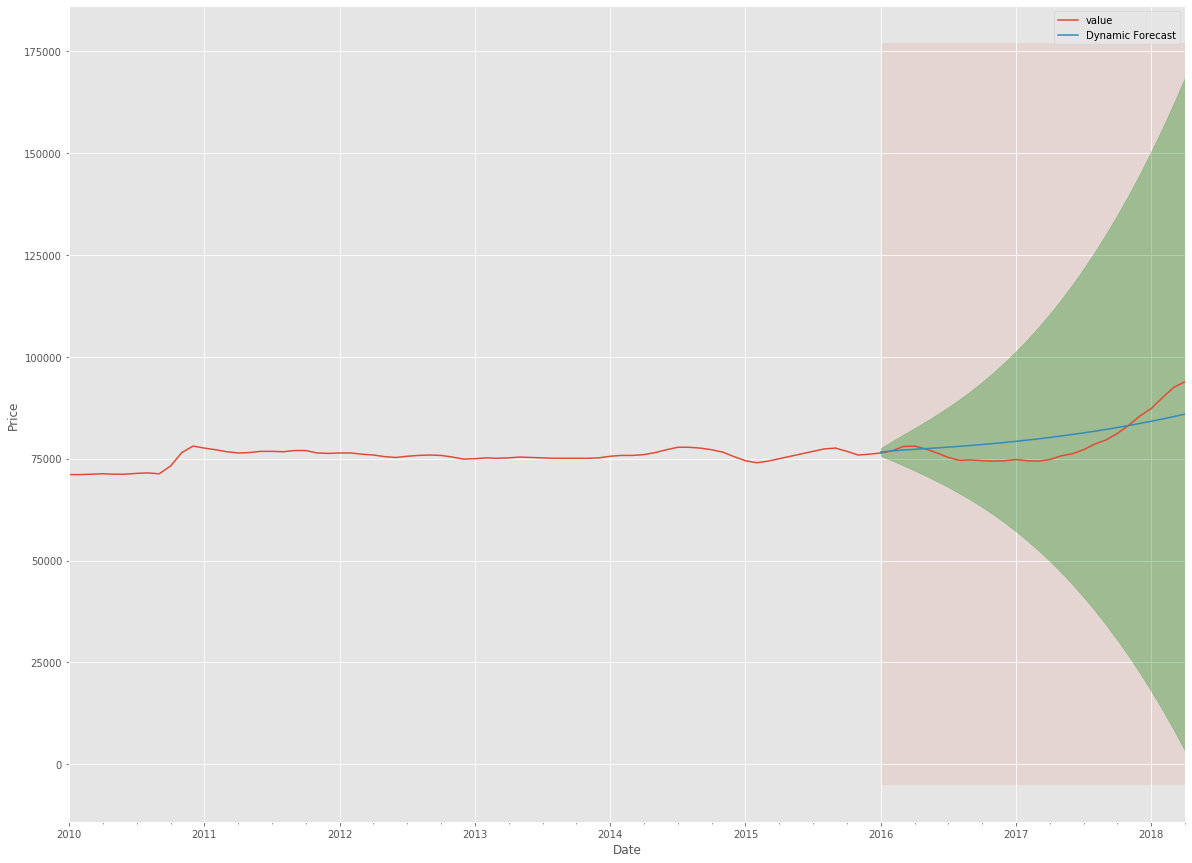

In [22]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [23]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 3922.74


In [45]:
print(mse)

41249183.489025325


## Producing and visualising forecasts

In [24]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

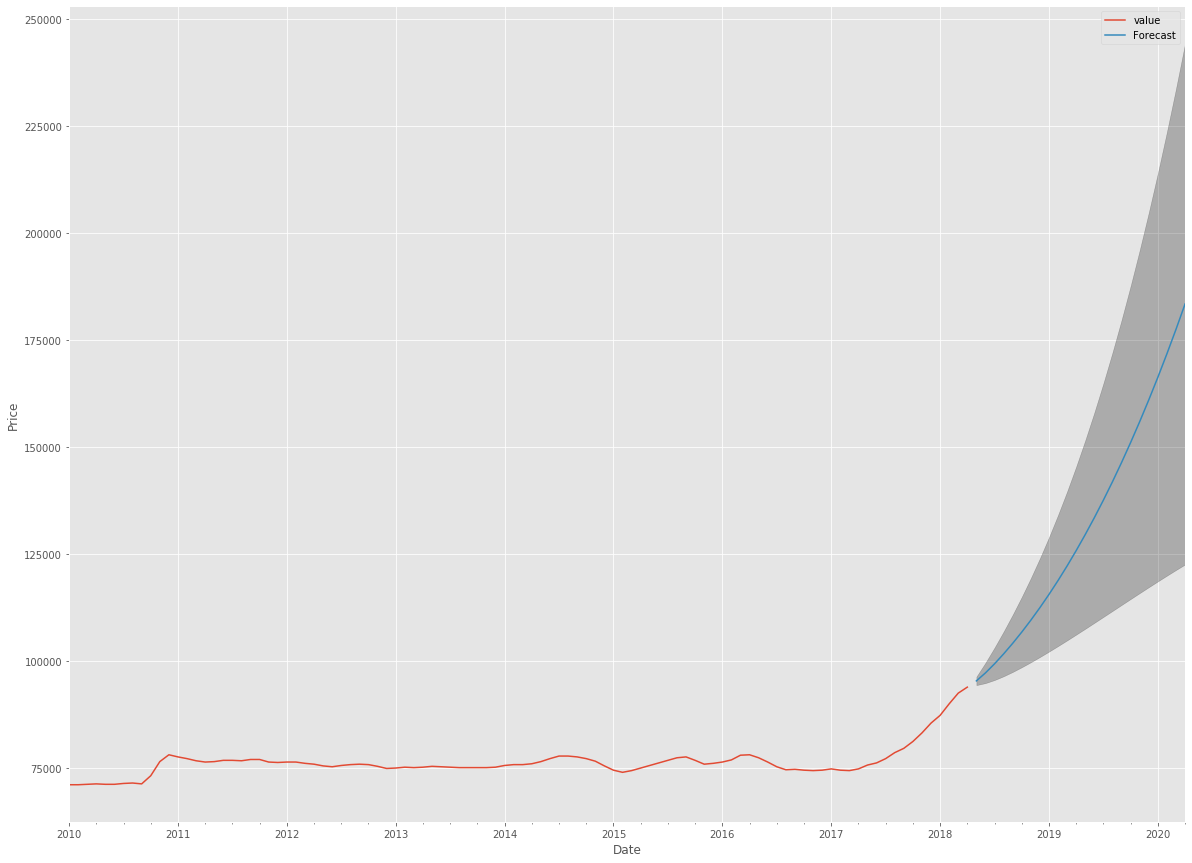

In [25]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [ ]:
prediction.predicted_mean['2020-01-01']

In [26]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.904745
